<a href="https://colab.research.google.com/github/anilkumargangadhara09/GenAI-ML/blob/main/DL_CEP2_House_Loan_Data_Analysis_V_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##House Loan Data Analysis

**Problem Statement:**
For a safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.


**Objective:** Create a model that predicts whether or not an applicant will be able to repay a loan using the historical data
Domain: Finance


**Analysis to be done:** Perform data preprocessing and build a deep learning prediction model

**Steps to be done:**

1)	Load the dataset that is given to you

2)	Check for null values in the dataset

3)	Print the percentage of default to a payer of the dataset for the TARGET column

4)	Balance the dataset if the data is imbalanced

5)	Plot the balanced or imbalanced data

6)	Encode the columns that is required for the model

7)	Calculate Sensitivity as a metric

8)	Calculate the area under  the receiver operating characteristics curve


In [ ]:
# House Loan Data Analysis
# Import necessary libraries

# Core Libraries for Data Handling and Analysis:
import pandas as pd
import numpy as np

# Data Visualization Libraries:
import matplotlib.pyplot as plt
import seaborn as sns

#
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Machine Learning Libraries:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl, Adam
from tensorflow.keras.layers import LeakyReLU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# Implementation

## Task 1

Load the dataset that is given to you

In [ ]:
#data loading
try:
    data = pd.read_csv('/content/loan_data.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the CSV: {e}")
    exit()


if data.empty:
    print("The Data is empty. Please check the file contents.")
    exit()
if 'data' in locals() or 'data' in globals():
    print("Data loaded successfully.")
    # Display the first few rows to verify
    display(data.head(2))
else:
    print("Failed to load the Data.")


Data loaded successfully.


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Task: Check for null values in the dataset

Calculate and display the percentage of default vs. non-default cases in the TARGET column.


In [ ]:
# Check for null values
null_counts = data.isnull().sum()
pd.set_option('display.max_rows', None)
nulls = pd.DataFrame(null_counts)

# np.where(nulls[0] > )
print(f'Null values per column: \n', null_counts)

Null values per column: 
 SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0

### Handle null values

Decide on strategy to handle null values (e.g., imputation, dropping rows/columns).

**Action.** Based on null counts, I will drop columns with more than 50% null values and impute the remaining nulls using the median for numerical columns and mode for categorical columns.

In [ ]:
# check null percentage
null_percentages = (null_counts / len(data)) * 100
# print(f'Percentage of null values per column: \n', percentages_null)

# Identify the columns with more than 50% nulls

cols_to_drop = null_percentages[null_percentages > 50].index
data.drop(columns=cols_to_drop, inplace=True)

# Impute remaining numerical nulls with the median
for col in data.select_dtypes(include=np.number).columns:
    if data[col].isnull().any():
        median_val = data[col].median()
        data[col].fillna(median_val, inplace=True)

# Impute remaining categorical nulls with the mode
for col in data.select_dtypes(include='object').columns:
    if data[col].isnull().any():
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)

# Verify that there are no more null values
null_counts_after_handling = data.isnull().sum()
print("\nNull values per column after handling:")
print(null_counts_after_handling[null_counts_after_handling > 0])




Null values per column after handling:
Series([], dtype: int64)


## Task: Print the percentage of default to a payer of the dataset for the TARGET column

In [ ]:
# Check percentage of default for the Target column
target_counts = data['TARGET'].value_counts()

print(target_counts)

target_percentages = (target_counts/len(data)) * 100
print(f'Percentage of default (1) vs. non-default (0) cases in TARGET column: \n', target_percentages)


TARGET
0    282686
1     24825
Name: count, dtype: int64
Percentage of default (1) vs. non-default (0) cases in TARGET column: 
 TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64


Target class is not distributed equal (data imbalanced)

## Task: Balance the dataset if the data is imbalanced

Address the class imbalance in the TARGET column using appropriate techniques (e.g., oversampling, undersampling).

In [ ]:
# Separate majority and minority classes
df_majority = data[data.TARGET == 0]
df_minority = data[data.TARGET == 1]

# Undersample majority class
df_majority_undersampled = df_majority.sample(len(df_minority), random_state=42)

# Concatenate undersampled majority and minority classes
data_balanced = pd.concat([df_majority_undersampled, df_minority])

# Display the class distribution in the balanced dataset
print("Class distribution in balanced dataset:")
print(data_balanced['TARGET'].value_counts())

Class distribution in balanced dataset:
TARGET
0    24825
1    24825
Name: count, dtype: int64


## Task: Plot the balanced or imbalanced data

display count plots for the original and balanced target variables to visualize the distribution before and after handling imbalance.

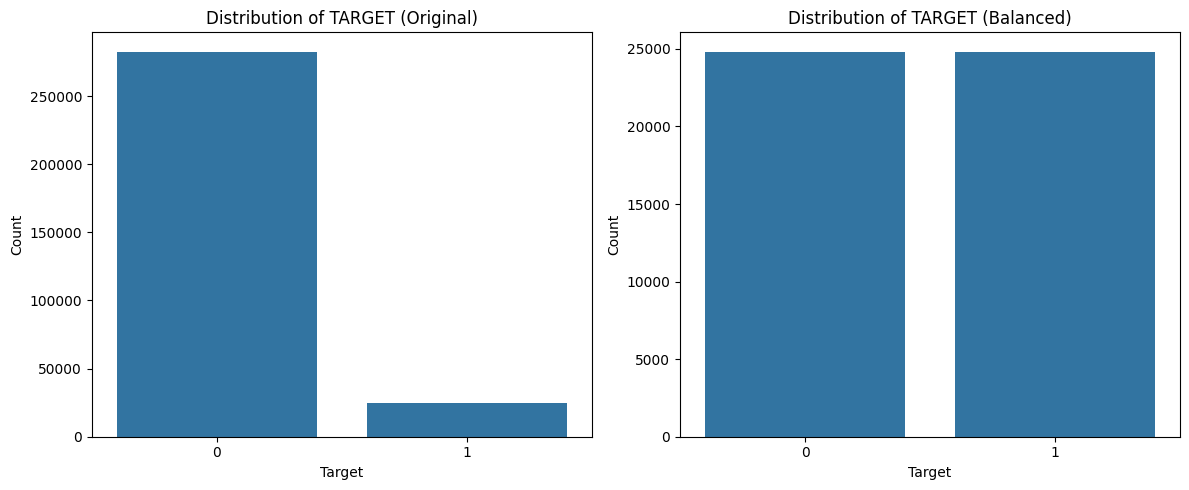

In [ ]:
# Plot the balanced or imbalanced data

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='TARGET', data=data)
plt.title('Distribution of TARGET (Original)')
plt.xlabel('Target')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='TARGET', data=data_balanced)
plt.title('Distribution of TARGET (Balanced)')
plt.xlabel('Target')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Task: Encode the columns that is required for the model

Identify categorical columns and apply one-hot encoding to convert them into a numerical format suitable for the deep learning model.

In [ ]:
# Identify categorical cols
categorical_cols = data_balanced.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(data_balanced, columns=categorical_cols, drop_first=True)
display(data_encoded.head())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_Yes
201622,333721,0,1,292500.0,1102500.0,32364.0,1102500.0,0.018209,-11763,-688,...,False,False,False,False,False,True,False,False,False,False
8728,110157,0,0,270000.0,720000.0,36000.0,720000.0,0.046220,-23199,365243,...,False,False,False,False,False,False,False,False,True,False
152555,276815,0,1,135000.0,360000.0,18000.0,360000.0,0.010966,-19165,-3432,...,False,False,False,False,False,False,False,False,False,False
218562,353213,0,0,90000.0,225000.0,10426.5,225000.0,0.015221,-10416,-1154,...,False,False,False,False,False,False,False,False,False,False
299619,447111,0,0,283500.0,1800000.0,51718.5,1800000.0,0.003541,-12125,-3256,...,False,False,False,False,False,False,False,False,False,False


## Split data

Split the encoded data into training and testing sets for model training and evaluation.

In [ ]:
# Split the encoded data into training and testing sets for model training and evaluation.
from sklearn.model_selection import train_test_split

X = data_encoded.drop('TARGET', axis=1)
y = data_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (37237, 179)
Shape of X_test: (12413, 179)
Shape of y_train: (37237,)
Shape of y_test: (12413,)


## Build deep learning model

Define and compile a deep learning model using TensorFlow/Keras.

In [ ]:
def build_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# build model
model = build_model(X_train.shape[1])

#Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,409 (130.50 KB)

 Trainable params: 33,409 (130.50 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

Train the deep learning model on the training data.

In [ ]:
# Train the deep learning model on the training data.
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5021 - loss: 5165.5786 - val_accuracy: 0.5046 - val_loss: 2.4707
Epoch 2/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5057 - loss: 24.8552 - val_accuracy: 0.4950 - val_loss: 0.6936
Epoch 3/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5029 - loss: 4.2475 - val_accuracy: 0.4950 - val_loss: 0.6933
Epoch 4/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4987 - loss: 3.2310 - val_accuracy: 0.4950 - val_loss: 0.6932
Epoch 5/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4983 - loss: 2.6949 - val_accuracy: 0.4950 - val_loss: 0.6933
Epoch 6/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4960 - loss: 1.7670 - val_accuracy: 0.4950 - val_loss: 0.6932
Epoch 7/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4979 - loss: 1.4271 - val_accuracy: 0.4950 - val_loss: 0.6932
Epoch 8/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4959 - loss: 1.0640 - val_accuracy

## Evaluate model

Evaluate the trained model on the testing data using appropriate metrics (e.g., accuracy, sensitivity, AUC).

In [ ]:
test_evl = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_evl[0]:.4f}")
print(f"Test Accuracy: {test_evl[1]:.4f}")

Test Loss: 0.6932
Test Accuracy: 0.4976


Calculate the sensitivity and AUC of the model.

388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Sensitivity: 0.0000
AUC: 0.5000


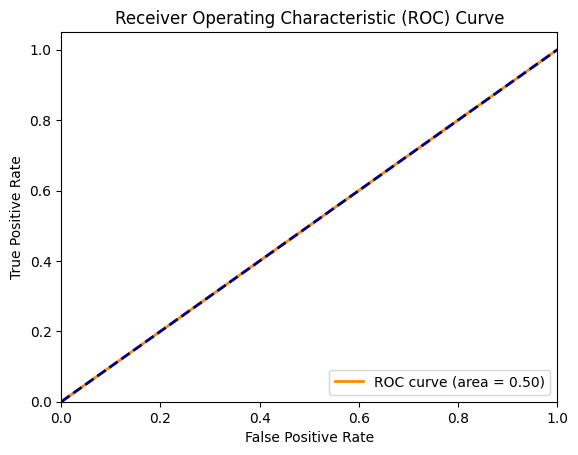

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Get predications
y_pred = model.predict(X_test)
# print(y_pred)
y_pred_classes = (y_pred > 0.5).astype("int32")
# print(y_pred_classes)

# Calculate Sensitivity (True Positive Rate)
cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")

# Calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Summary:

1. The initial dataset had a significant number nulls, with some columns having more than 50% missing data. Columns with more than 50% missing values were dropped, while remaining numerical columns imputed with the median and categorical nulls with the mode.
2. The original Target column was highly impbalanced, with approximately 91.93% non-default cases(0) and 8.07% default cases(1)

3. Random undersampling of the majority class successfully balanced the dataset, resulting in an equal distribution of default and non-default cases.

4. Categorical features were successfully encoded using one-hot encoding.

5. The data was split into training and testing sets with a 75% - 25% ratio.

6. A Sequential deep learning model with three hidden layers and dropout was defined and compiled using the **Adam** optimizer and **binary-crossentropy** loss. The model has **33,409** Trainable params

7. The model was trained for 14 epochs before early stopping was triggered based on validation loss.

8. The model achieved test accuracy **49.76%**

9. AUC score of 0.50 indicates that the model has perfect discrimination ability





# Task
Improve the AUC and Sensitivity of the deep learning prediction model by exploring alternative architectures, tuning hyperparameters, experimenting with data balancing techniques, performing feature engineering, and implementing cross-validation.

## Explore alternative deep learning architectures

### Subtask:
Experiment with different network structures, activation functions, and optimizers.


**Reasoning**:
Define a new function to build a deep learning model with a different architecture, activation functions, and optimizers, then instantiate, compile, and train the model.



In [ ]:
# def build_improved_model(input_shape, optimizer='adam', activation='relu'):
#     model = Sequential([
#         Dense(256, activation=activation, input_shape=(input_shape,)),
#         Dropout(0.4),
#         Dense(128, activation=activation),
#         Dropout(0.4),
#         Dense(64, activation=activation),
#         Dropout(0.4),
#         Dense(1, activation='sigmoid')
#     ])

#     model.compile(optimizer=optimizer,
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])

#     return model

# # Experiment with different configurations
# optimizers = ['adam', 'rmsprop']
# activations = ['relu', 'tanh']

# results = {}

# for opt in optimizers:
#     for act in activations:
#         print(f"\nTraining with Optimizer: {opt}, Activation: {act}")
#         improved_model = build_improved_model(X_train.shape[1], optimizer=opt, activation=act)

#         history_improved = improved_model.fit(X_train, y_train,
#                                               validation_split=0.0, # Use all training data
#                                               epochs=50, # Increased epochs for better convergence
#                                               callbacks=[early_stopping],
#                                               verbose=0)

#         test_evl_improved = improved_model.evaluate(X_test, y_test, verbose=0)
#         results[f'{opt}_{act}'] = test_evl_improved
#         print(f"Test Loss: {test_evl_improved[0]:.4f}")
#         print(f"Test Accuracy: {test_evl_improved[1]:.4f}")

# # Print summary of results
# print("\nSummary of Results:")
# for config, metrics in results.items():
#     print(f"{config}: Test Loss = {metrics[0]:.4f}, Test Accuracy = {metrics[1]:.4f}")

In [ ]:
!pip install scikeras

In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop

def build_improved_model(input_shape, optimizer='adam', activation='relu'):
    model = Sequential([
        Dense(256, activation=activation, input_shape=(input_shape,)),
        Dropout(0.4),
        Dense(128, activation=activation),
        Dropout(0.4),
        Dense(64, activation=activation),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Wrap the Keras model with KerasClassifier
keras_model = KerasClassifier(model=build_improved_model, input_shape=X_train.shape[1], verbose=0)

# Define the grid of hyperparameters to tune
param_grid = {
    'model__optimizer': [Adam(), RMSprop()],
    'model__activation': ['relu', 'tanh'],
    'epochs': [10, 20],  # Reduced epochs for faster tuning
    'batch_size': [32, 64]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, scoring='roc_auc')

# Perform the grid search
grid_result = grid_search.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_auc = best_model.score(X_test, y_test)
print(f"\nTest AUC of the best model: {test_auc:.4f}")

Best: nan using {'batch_size': 32, 'epochs': 10, 'model__activation': 'relu', 'model__optimizer': <keras.src.optimizers.adam.Adam object at 0x7e91f6f67d10>}
nan (nan) with: {'batch_size': 32, 'epochs': 10, 'model__activation': 'relu', 'model__optimizer': <keras.src.optimizers.adam.Adam object at 0x7e91f6f67d10>}
nan (nan) with: {'batch_size': 32, 'epochs': 10, 'model__activation': 'relu', 'model__optimizer': <keras.src.optimizers.rmsprop.RMSprop object at 0x7e91ecfb56d0>}
nan (nan) with: {'batch_size': 32, 'epochs': 10, 'model__activation': 'tanh', 'model__optimizer': <keras.src.optimizers.adam.Adam object at 0x7e91f6f67d10>}
nan (nan) with: {'batch_size': 32, 'epochs': 10, 'model__activation': 'tanh', 'model__optimizer': <keras.src.optimizers.rmsprop.RMSprop object at 0x7e91ecfb56d0>}
nan (nan) with: {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__optimizer': <keras.src.optimizers.adam.Adam object at 0x7e91f6f67d10>}
nan (nan) with: {'batch_size': 32, 'epochs': 2